In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 66kB/s 
     |████████████████████████████████| 3.1MB 42.4MB/s 
     |████████████████████████████████| 501kB 53.6MB/s 


In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [15]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3024 - accuracy: 0.9126 - val_loss: 0.1471 - val_accuracy: 0.9558
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1431 - accuracy: 0.9578 - val_loss: 0.1032 - val_accuracy: 0.9712
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1087 - accuracy: 0.9667 - val_loss: 0.0835 - val_accuracy: 0.9758
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0891 - accuracy: 0.9719 - val_loss: 0.0794 - val_accuracy: 0.9768
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0752 - accuracy: 0.9762 - val_loss: 0.0750 - val_accuracy: 0.9772
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0657 - accuracy: 0.9786 - val_loss: 0.0690 - val_accuracy: 0.9787
Epoch 7/10
60000/60000 [==============================] 

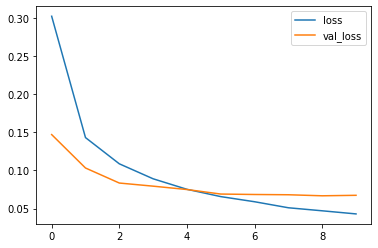

In [28]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label ='val_loss')
plt.legend()

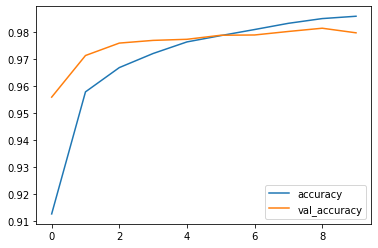

In [29]:
plt.plot(r.history['accuracy'],label ='accuracy')
plt.plot(r.history['val_accuracy'],label ='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[ 972    1    1    1    0    1    1    1    1    1]
 [   0 1126    2    2    0    1    1    1    2    0]
 [   3    1 1003    5    2    0    2    5    9    2]
 [   0    1    2  997    0    3    0    2    2    3]
 [   1    0    2    0  952    0    6    2    2   17]
 [   2    1    0    3    2  873    5    1    2    3]
 [   6    2    1    1    4    3  938    1    2    0]
 [   2    5    7    8    0    0    0  992    3   11]
 [   3    0    1    4    4    6    1    3  950    2]
 [   2    2    0    2    5    2    0    2    1  993]]


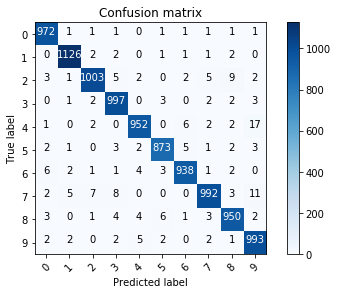

In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

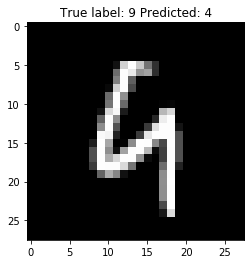

In [44]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [41]:
misclassified_idx = np.where(p_test != y_test)
misclassified_idx

(array([ 115,  119,  149,  151,  233,  247,  259,  274,  321,  337,  359,
         445,  447,  551,  582,  613,  619,  659,  684,  691,  720,  726,
         740,  844,  846,  951,  956,  965, 1014, 1039, 1050, 1112, 1156,
        1226, 1232, 1242, 1247, 1260, 1289, 1319, 1328, 1378, 1393, 1444,
        1496, 1500, 1522, 1530, 1549, 1609, 1670, 1671, 1681, 1717, 1754,
        1790, 1901, 1987, 2004, 2016, 2024, 2040, 2043, 2044, 2053, 2070,
        2109, 2118, 2130, 2135, 2182, 2293, 2299, 2387, 2447, 2454, 2488,
        2607, 2654, 2810, 2877, 2896, 2915, 2921, 2927, 2930, 2939, 2953,
        3030, 3062, 3073, 3117, 3130, 3289, 3333, 3394, 3422, 3451, 3490,
        3503, 3520, 3533, 3558, 3559, 3567, 3597, 3604, 3681, 3749, 3751,
        3767, 3780, 3796, 3808, 3811, 3838, 3853, 3902, 3906, 3941, 3943,
        3976, 4065, 4075, 4152, 4163, 4176, 4199, 4201, 4224, 4248, 4289,
        4374, 4382, 4384, 4497, 4536, 4567, 4571, 4601, 4615, 4635, 4723,
        4751, 4807, 4814, 4823, 4860, 